# CPA Attack implementation

## Very Raw version, putting code togetehr

### AES

![round](img/rounds.png)


![last-round](img/lastRoung.png)

In [1]:
import numpy as np
from tqdm import tnrange
import matplotlib.pyplot as plt

### Loading Traces

In [2]:
aes_traces_50_tracedata = np.load(r"traces/lab4_2_traces.npy")
aes_traces_50_textindata = np.load(r"traces/lab4_2_textin.npy")
key = np.load(r"traces/lab4_2_key.npy")

trace_array = aes_traces_50_tracedata
textin_array = aes_traces_50_textindata

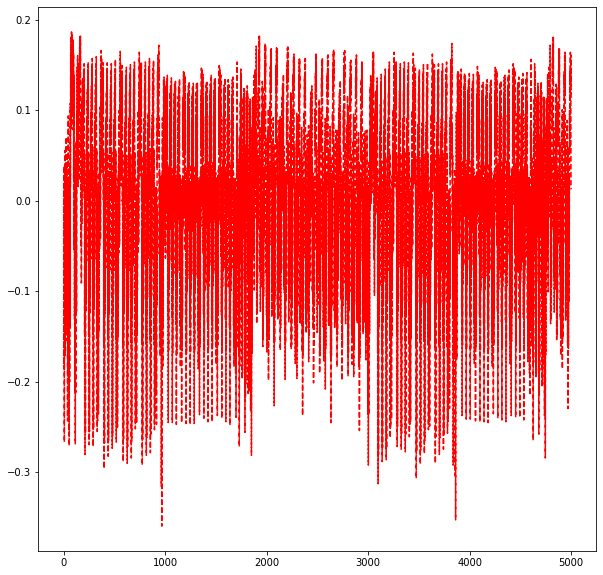

In [3]:
from matplotlib.pyplot import figure

plt.rcParams['figure.figsize'] = [10, 10]

plt.plot(trace_array[0],'r--')

### SBOX and AES Simulation

A simple AES function is implemented to get the Hamming Weight in the byte level. A lookup table is used instead of doing the affine transform method.

In [4]:
sbox = [
    # 0    1    2    3    4    5    6    7    8    9    a    b    c    d    e    f 
    0x63,0x7c,0x77,0x7b,0xf2,0x6b,0x6f,0xc5,0x30,0x01,0x67,0x2b,0xfe,0xd7,0xab,0x76, # 0
    0xca,0x82,0xc9,0x7d,0xfa,0x59,0x47,0xf0,0xad,0xd4,0xa2,0xaf,0x9c,0xa4,0x72,0xc0, # 1
    0xb7,0xfd,0x93,0x26,0x36,0x3f,0xf7,0xcc,0x34,0xa5,0xe5,0xf1,0x71,0xd8,0x31,0x15, # 2
    0x04,0xc7,0x23,0xc3,0x18,0x96,0x05,0x9a,0x07,0x12,0x80,0xe2,0xeb,0x27,0xb2,0x75, # 3
    0x09,0x83,0x2c,0x1a,0x1b,0x6e,0x5a,0xa0,0x52,0x3b,0xd6,0xb3,0x29,0xe3,0x2f,0x84, # 4
    0x53,0xd1,0x00,0xed,0x20,0xfc,0xb1,0x5b,0x6a,0xcb,0xbe,0x39,0x4a,0x4c,0x58,0xcf, # 5
    0xd0,0xef,0xaa,0xfb,0x43,0x4d,0x33,0x85,0x45,0xf9,0x02,0x7f,0x50,0x3c,0x9f,0xa8, # 6
    0x51,0xa3,0x40,0x8f,0x92,0x9d,0x38,0xf5,0xbc,0xb6,0xda,0x21,0x10,0xff,0xf3,0xd2, # 7
    0xcd,0x0c,0x13,0xec,0x5f,0x97,0x44,0x17,0xc4,0xa7,0x7e,0x3d,0x64,0x5d,0x19,0x73, # 8
    0x60,0x81,0x4f,0xdc,0x22,0x2a,0x90,0x88,0x46,0xee,0xb8,0x14,0xde,0x5e,0x0b,0xdb, # 9
    0xe0,0x32,0x3a,0x0a,0x49,0x06,0x24,0x5c,0xc2,0xd3,0xac,0x62,0x91,0x95,0xe4,0x79, # a
    0xe7,0xc8,0x37,0x6d,0x8d,0xd5,0x4e,0xa9,0x6c,0x56,0xf4,0xea,0x65,0x7a,0xae,0x08, # b
    0xba,0x78,0x25,0x2e,0x1c,0xa6,0xb4,0xc6,0xe8,0xdd,0x74,0x1f,0x4b,0xbd,0x8b,0x8a, # c
    0x70,0x3e,0xb5,0x66,0x48,0x03,0xf6,0x0e,0x61,0x35,0x57,0xb9,0x86,0xc1,0x1d,0x9e, # d
    0xe1,0xf8,0x98,0x11,0x69,0xd9,0x8e,0x94,0x9b,0x1e,0x87,0xe9,0xce,0x55,0x28,0xdf, # e
    0x8c,0xa1,0x89,0x0d,0xbf,0xe6,0x42,0x68,0x41,0x99,0x2d,0x0f,0xb0,0x54,0xbb,0x16  # f
]

def aes_internal(inputdata, key):
    XOR_res= inputdata ^ key
    return(sbox[XOR_res])



### Hamming Weight Calculation 

Find the number of **set bits**

In [5]:
def calc_hamming_weight(n):
    return bin(n).count("1")

Creating a looup table, the bytes range from 0 to 255.

In [6]:
bit_vals=np.arange(0,256)
HW=[calc_hamming_weight(k) for k in bit_vals]

print(type(0xAA))

<class 'int'>


**TESTING**

In [7]:
test_1=HW[aes_internal(0xA7, 0x9b)] == 6
test_2=HW[aes_internal(0x89, 0xe6)] == 3

if test_1 and test_2:
    print("Correct! ")

Correct! 


## CPA

The actual algorithm is as follows for datasets $X$ and $Y$ of length $N$, with means of $\bar{X}$ and $\bar{Y}$, respectively:

$$r = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$$

$cov(X, Y)$ is the covariance of `X` and `Y` and can be calculated as follows:

$$cov(X, Y) = \sum_{n=1}^{N}[(Y_n - \bar{Y})(X_n - \bar{X})]$$

$\sigma_X$ and $\sigma_Y$ are the standard deviation of the two datasets. This value can be calculated with the following equation:

$$\sigma_X = \sqrt{\sum_{n=1}^{N}(X_n - \bar{X})^2}$$



In [8]:
def mean(X):
    return np.mean(X,axis=0)

def std_dev(X, X_bar):
    return np.sqrt(np.sum((X-X_bar)**2,axis=0))

def cov(X, X_bar, Y, Y_bar):
    return np.sum((X-X_bar)*(Y-Y_bar),axis=0)

Using Online Data

In [9]:
print(len(trace_array))
print(trace_array)

50
[[ 0.03710938 -0.18554688 -0.12402344 ...  0.02539062  0.01757812
   0.01269531]
 [ 0.04296875 -0.18261719 -0.11621094 ...  0.02050781  0.01660156
   0.01171875]
 [ 0.04101562 -0.18261719 -0.1171875  ...  0.03515625  0.02832031
   0.02050781]
 ...
 [ 0.04394531 -0.1796875  -0.1171875  ...  0.04003906  0.03222656
   0.0234375 ]
 [ 0.0390625  -0.18457031 -0.12011719 ...  0.02636719  0.0234375
   0.015625  ]
 [ 0.04003906 -0.18164062 -0.11816406 ...  0.03710938  0.02636719
   0.01953125]]


### CPA to find first byte
1.First we do correlations

2.Extract the maximum and its respective key

In [10]:
maxcpa = [0] * 256 #all zeros to start with

#Using Python broadcasting
t_bar = mean(trace_array) 
o_t = std_dev(trace_array, t_bar)
print(len(t_bar))

for kguess in tnrange(0, 256):
    hws = np.array([[HW[aes_internal(textin[0],kguess)] for textin in textin_array]]).transpose()
    hws_bar=mean(hws)
    o_hws=std_dev(hws,hws_bar)
    cpaoutput = (cov(hws,hws_bar,trace_array,t_bar))/(o_t*o_hws)
    maxcpa[kguess] = cpaoutput


5000


C:\Users\ub352\AppData\Local\Temp/ipykernel_18312/3912030497.py:8: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for kguess in tnrange(0, 256):


  0%|          | 0/256 [00:00<?, ?it/s]

In [11]:
#get highest correlation and the responsible key byte

correlations=[np.max(np.abs(k)) for k in maxcpa]

guess=np.argmax(correlations)
guess_corr=np.max(correlations)

print("Key guess: ", hex(guess)," = ", guess)
print("Correlation: ", guess_corr)

Key guess:  0x2b  =  43
Correlation:  0.9136135504483415


Using the validation code from Source of traces to see if the key has been guessed correctly

In [12]:
assert guess == 0x2b
print("✔️ OK to continue!")

✔️ OK to continue!


#### Applying it to all the bytes

In [13]:
t_bar = np.sum(trace_array, axis=0)/len(trace_array)
o_t = np.sqrt(np.sum((trace_array - t_bar)**2, axis=0))

bestguess = [0] * 16 #put your key byte guesses here

for bnum in tnrange(0, 16):
    maxcpa = [0] * 256
    for kguess in range(0, 256):
        
        #Repeating the key byte guessing process from the last loop
        hws = np.array([[HW[aes_internal(textin[bnum],kguess)] for textin in textin_array]]).transpose()
        hws_bar=mean(hws)
        o_hws=std_dev(hws,hws_bar)
        cpaoutput = (cov(hws,hws_bar,trace_array,t_bar))/(o_t*o_hws)
        maxcpa[kguess] = cpaoutput
        
        #Get the highes correlation
        correlations=[np.max(np.abs(k)) for k in maxcpa]
        guess=np.argmax(correlations)
        # guess_corr=np.max(correlations)

        #store the bytes
        bestguess[bnum]= guess

        
print("Best Key Guess: ", end="")
for b in bestguess: print("%02x " % b, end="")
print(len(bestguess))

C:\Users\ub352\AppData\Local\Temp/ipykernel_18312/1122157927.py:6: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for bnum in tnrange(0, 16):


  0%|          | 0/16 [00:00<?, ?it/s]

Best Key Guess: 2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c 16


Using Validation Code to see if the key is correct


In [14]:
for bnum in range(16):
    assert bestguess[bnum] == key[bnum], \
    "Byte {} failed, expected {:02X} got {:02X}".format(bnum, key[bnum], bestguess[bnum])
print("✔️ OK to continue!")


✔️ OK to continue!


### Key Found Successfully

In [15]:
temp=[hex(k).split('x')[-1] for k in bestguess]
final_key="0x"+''.join(temp)

print("The Key is  ",final_key)

The Key is   0x2b7e151628aed2a6abf715889cf4f3c
